<a href="https://colab.research.google.com/github/VincentNFR/openclassrooms_p06/blob/analyse_exploratoire/analyse_exploratoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse exploratoire du dataset

### Import du dataset

In [1]:
%pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds


dataset_name = "stanford_dogs"
dataset, info = tfds.load(name=dataset_name, with_info=True)

### Visualisation des données importées

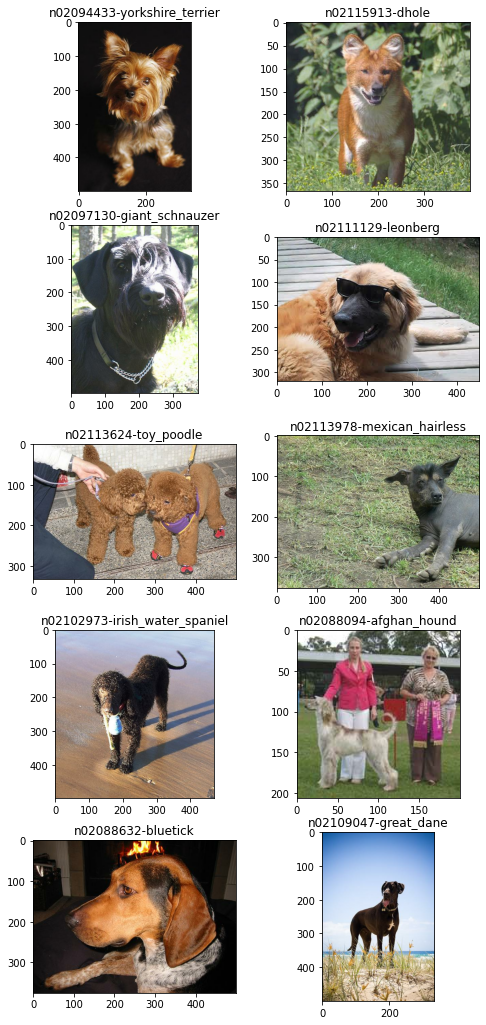

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
get_dog_name = info.features['label'].int2str

plt.figure(figsize=(8,18), facecolor='white')
for idx, dog in enumerate(dataset['train'].take(10)):
    plt.subplot(5, 2, idx+1) #idx start at 1
    plt.imshow(dog['image'])
    plt.title(get_dog_name(dog['label']))
plt.show()

In [5]:
print(f"Nombre d'image dans le train set : {len(dataset['train'])}")
print(f"Nombre d'image dans le test set :{len(dataset['test'])}")

Nombre d'image dans le train set : 12000
Nombre d'image dans le test set :8580


### Etude des propriétés des images

In [6]:
df = pd.concat([tfds.as_dataframe(dataset['train'], info), tfds.as_dataframe(dataset['test'], info)], axis=0)
dataset=None

In [7]:
df.head(5)

,image,image/filename,label,objects/bbox
0,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",b'Images/n02094433-Yorkshire_terrier/n02094433...,36,"[[0.044, 0.2102102, 0.972, 0.960961]]"
1,"[[[26, 25, 30], [25, 24, 29], [24, 23, 28], [2...",b'Images/n02115913-dhole/n02115913_3998.jpg',118,"[[0.07084469, 0.28, 0.98092645, 0.6975]]"
2,"[[[110, 131, 114], [107, 128, 109], [113, 130,...",b'Images/n02097130-giant_schnauzer/n02097130_2...,46,"[[0.062, 0.0, 0.996, 0.96533334]]"
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",b'Images/n02111129-Leonberg/n02111129_2072.jpg',103,"[[0.18068536, 0.0044444446, 0.99688476, 0.9488..."
4,"[[[252, 252, 252], [253, 253, 253], [253, 253,...",b'Images/n02113624-toy_poodle/n02113624_4349.jpg',113,"[[0.003003003, 0.206, 0.9069069, 0.566], [0.14..."


In [8]:
df.drop(columns=['image/filename', 'objects/bbox'], inplace=True)
df.columns

Index(['image', 'label'], dtype='object')

In [9]:
df['widths'] = df['image'].apply(lambda x: x.shape[1])
df['heights'] = df['image'].apply(lambda x: x.shape[0])
df.head(5)

,image,label,widths,heights
0,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",36,333,500
1,"[[[26, 25, 30], [25, 24, 29], [24, 23, 28], [2...",118,400,367
2,"[[[110, 131, 114], [107, 128, 109], [113, 130,...",46,375,500
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",103,450,321
4,"[[[252, 252, 252], [253, 253, 253], [253, 253,...",113,500,333


In [10]:
labels = df.label.value_counts(ascending=False).reset_index(name='count')
labels['breed'] = labels['index'].apply(lambda x: ' '.join(get_dog_name(x).split('-')[1:]))
labels.head(15)

,index,count,breed
0,2,252,maltese_dog
1,9,239,afghan_hound
2,26,232,scottish_deerhound
3,107,219,pomeranian
4,106,218,samoyed
5,19,218,irish_wolfhound
6,88,218,bernese_mountain_dog
7,4,214,shih tzu
8,105,213,great_pyrenees
9,103,210,leonberg


In [11]:
labels['count'].describe()

count    120.000000
mean     171.500000
std       23.220898
min      148.000000
25%      152.750000
50%      159.500000
75%      186.250000
max      252.000000
Name: count, dtype: float64

Il y a 120 espèce de chien dans le dataset.
La race la plus présente a 252 photos et la race la moins présente en a 148.

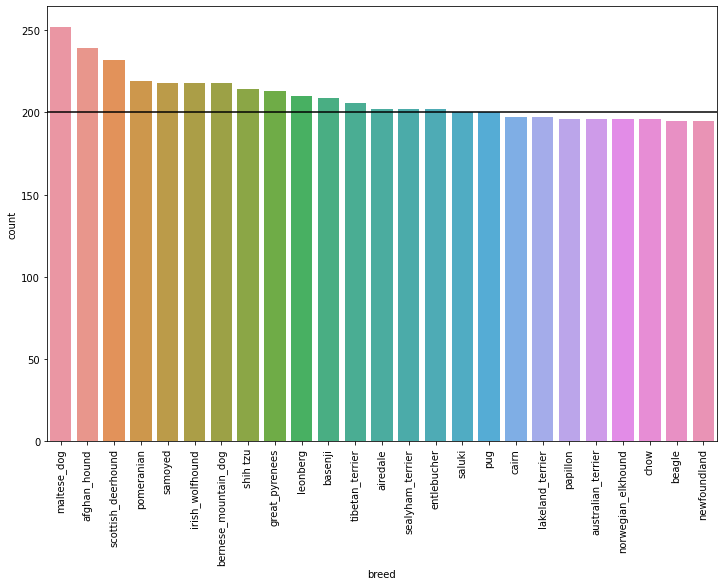

In [12]:
plt.figure(figsize=(18,8), facecolor='white')
a = sns.barplot(x="breed", y="count", data=labels[:35])
a.set_xticklabels(labels=labels['breed'], rotation=90)
plt.axhline(y=200, c='k')
plt.show()

In [13]:
labels[labels['count']>=200]

,index,count,breed
0,2,252,maltese_dog
1,9,239,afghan_hound
2,26,232,scottish_deerhound
3,107,219,pomeranian
4,106,218,samoyed
5,19,218,irish_wolfhound
6,88,218,bernese_mountain_dog
7,4,214,shih tzu
8,105,213,great_pyrenees
9,103,210,leonberg


On conserve les classes qui ont au moins 200 images, c'est à dire 17 races de chien.

In [14]:
labels_to_keep = labels[labels['count']>=200]['breed'].tolist()
labels_to_keep

['maltese_dog',
 'afghan_hound',
 'scottish_deerhound',
 'pomeranian',
 'samoyed',
 'irish_wolfhound',
 'bernese_mountain_dog',
 'shih tzu',
 'great_pyrenees',
 'leonberg',
 'basenji',
 'tibetan_terrier',
 'airedale',
 'sealyham_terrier',
 'entlebucher',
 'saluki',
 'pug']

In [15]:
df.label = df.label.apply(lambda x: ' '.join(get_dog_name(x).split('-')[1:]))
df.head(5)

,image,label,widths,heights
0,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",yorkshire_terrier,333,500
1,"[[[26, 25, 30], [25, 24, 29], [24, 23, 28], [2...",dhole,400,367
2,"[[[110, 131, 114], [107, 128, 109], [113, 130,...",giant_schnauzer,375,500
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",leonberg,450,321
4,"[[[252, 252, 252], [253, 253, 253], [253, 253,...",toy_poodle,500,333


In [16]:
df.shape

(20580, 4)

In [17]:
df['label'] = df['label'].apply(lambda x: x if x in labels_to_keep else None)

In [18]:
df.dropna(subset=['label'], inplace=True)
df.shape

(3654, 4)

### Etude du format des images

In [19]:
df['widths'].describe()

count    3654.000000
mean      451.431856
std       120.924417
min       117.000000
25%       375.000000
50%       500.000000
75%       500.000000
max      2048.000000
Name: widths, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


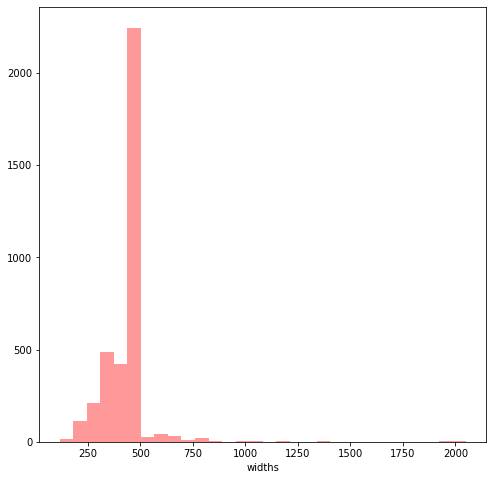

In [20]:
plt.figure(figsize=(8,8), facecolor='white')
sns.distplot(df['widths'], kde = False, color ='red', bins = 30)
plt.show()

In [21]:
df[df['widths']>1000]

,image,label,widths,heights
523,"[[[132, 148, 121], [132, 148, 121], [131, 147,...",entlebucher,2048,1536
2655,"[[[48, 80, 95], [48, 80, 95], [48, 80, 95], [4...",maltese_dog,1268,928
5527,"[[[100, 128, 132], [28, 56, 59], [66, 96, 98],...",basenji,1348,1007
8330,"[[[74, 108, 24], [72, 106, 22], [72, 104, 19],...",entlebucher,2048,1536
8553,"[[[122, 156, 204], [122, 156, 204], [122, 156,...",scottish_deerhound,1397,1208
8976,"[[[103, 122, 164], [103, 122, 164], [103, 122,...",bernese_mountain_dog,1920,2560
11932,"[[[242, 254, 242], [234, 246, 232], [247, 255,...",entlebucher,2048,1536
11979,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",sealyham_terrier,1015,686
448,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",basenji,1536,1024
1205,"[[[22, 21, 0], [127, 128, 71], [155, 155, 105]...",afghan_hound,1152,864


In [22]:
df['heights'].describe()

count    3654.000000
mean      389.750958
std       109.727829
min       110.000000
25%       333.000000
50%       375.000000
75%       477.750000
max      2560.000000
Name: heights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


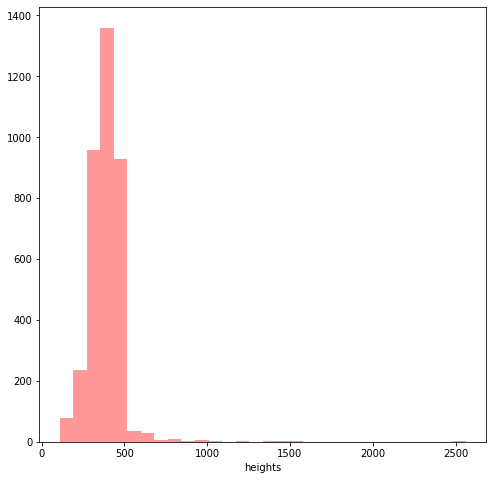

In [23]:
plt.figure(figsize=(8,8), facecolor='white')
sns.distplot(df['heights'], kde = False, color ='red', bins = 30)
plt.show()

Il est nécessaire de rescale les images en fonction du modèle à utiliser.

In [24]:
df[df['heights']>1000]

,image,label,widths,heights
523,"[[[132, 148, 121], [132, 148, 121], [131, 147,...",entlebucher,2048,1536
5527,"[[[100, 128, 132], [28, 56, 59], [66, 96, 98],...",basenji,1348,1007
8330,"[[[74, 108, 24], [72, 106, 22], [72, 104, 19],...",entlebucher,2048,1536
8553,"[[[122, 156, 204], [122, 156, 204], [122, 156,...",scottish_deerhound,1397,1208
8976,"[[[103, 122, 164], [103, 122, 164], [103, 122,...",bernese_mountain_dog,1920,2560
11932,"[[[242, 254, 242], [234, 246, 232], [247, 255,...",entlebucher,2048,1536
448,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",basenji,1536,1024
6047,"[[[233, 208, 177], [233, 208, 177], [233, 208,...",entlebucher,945,1407
6139,"[[[122, 80, 58], [113, 71, 49], [110, 68, 46],...",sealyham_terrier,1979,1443
6445,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",basenji,701,1049


Une grande majorité des images ont une largeur de 500px.

In [25]:
df.shape

(3654, 4)

Les images de taille trop grande (+1 000 px) sont supprimées

In [26]:
df = df[df['heights']<1000]
df = df[df['widths']<1000]

In [27]:
df.drop(columns=['widths','heights'], inplace=True)

In [28]:
df.shape

(3636, 2)

Le jeu de données est petit, entre 250 et 200 images par race de chien. Il va être proposé d'augmenter la taille du jeu de données.

In [34]:
df.head(5)

,image,label
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",leonberg
7,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",afghan_hound
13,"[[[74, 68, 42], [56, 50, 24], [59, 53, 27], [7...",samoyed
15,"[[[126, 129, 108], [142, 145, 124], [173, 176,...",basenji
19,"[[[243, 242, 247], [243, 242, 247], [243, 242,...",leonberg


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/OpenClassRooms/6/data/input_data.csv')
print('dataset saved')

dataset saved
